üåü 7 Angel Stocks LSTM Prediction + Data Warehouse üåü
üìä Data Source: Yahoo Finance API (yfinance)
üíæ CSV Files will be saved to: ./data_warehouse/

üìà Processing AAPL - Apple Inc.
üì• ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏î‡∏≤‡∏ß‡∏ô‡πå‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• AAPL ‡∏à‡∏≤‡∏Å Yahoo Finance...
üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å AAPL raw data -> data_warehouse/raw_data/AAPL_raw_data.csv
üîÑ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å model ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö AAPL...
üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å AAPL predictions -> data_warehouse/predictions/AAPL_predictions.csv
‚úÖ AAPL ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à - RMSE: 6.34

üìà Processing MSFT - Microsoft Corp.
üì• ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏î‡∏≤‡∏ß‡∏ô‡πå‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• MSFT ‡∏à‡∏≤‡∏Å Yahoo Finance...
üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å MSFT raw data -> data_warehouse/raw_data/MSFT_raw_data.csv
üîÑ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å model ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MSFT...
üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å MSFT predictions -> data_warehouse/predictions/MSFT_predictions.csv
‚úÖ MSFT ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à - RMSE: 11.33

üìà Processi

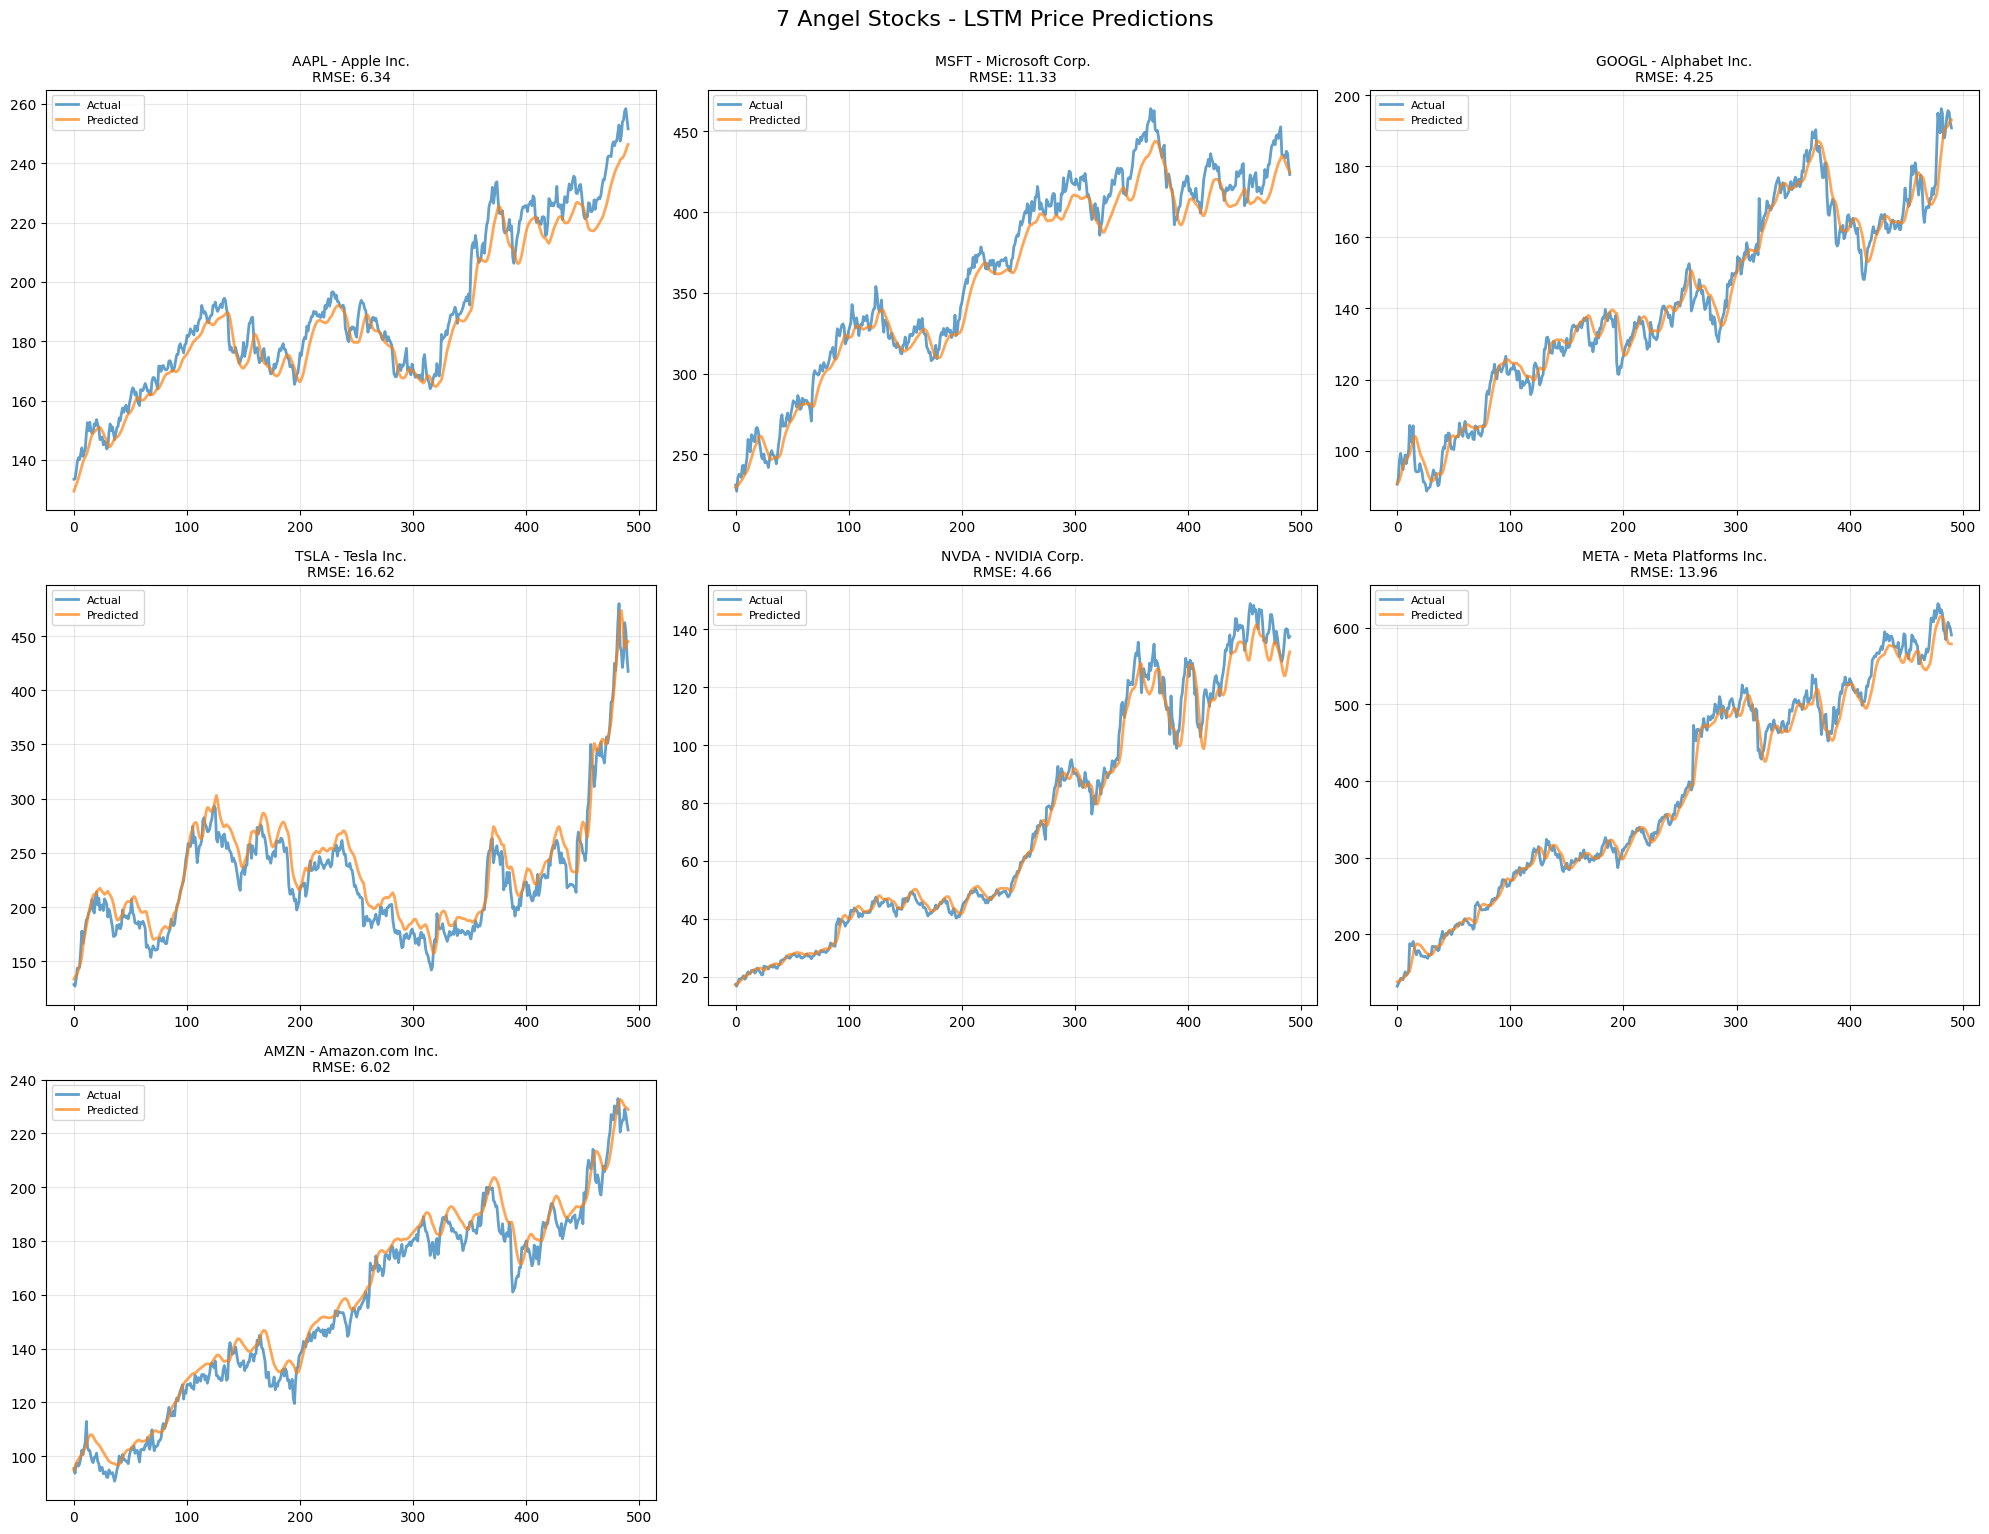


üíæ SAVING DATA WAREHOUSE FILES...
‚úÖ Combined Raw Data: data_warehouse/ALL_STOCKS_RAW_DATA.csv
   üìä Total Records: 17,605
‚úÖ Combined Predictions: data_warehouse/ALL_STOCKS_PREDICTIONS.csv
   üìä Total Predictions: 3,437
‚úÖ Performance Analytics: data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv
‚úÖ Data Dictionary: data_warehouse/DATA_DICTIONARY.csv

üìÅ DATA WAREHOUSE STRUCTURE:
‚îî‚îÄ‚îÄ data_warehouse/
    ‚îú‚îÄ‚îÄ ALL_STOCKS_RAW_DATA.csv       (‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)
    ‚îú‚îÄ‚îÄ ALL_STOCKS_PREDICTIONS.csv    (‡∏£‡∏ß‡∏°‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)
    ‚îú‚îÄ‚îÄ DATA_DICTIONARY.csv           (‡∏Ñ‡∏≥‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•)
    ‚îú‚îÄ‚îÄ raw_data/                     (‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô)
    ‚îÇ   ‚îú‚îÄ‚îÄ AAPL_raw_data.csv
    ‚îÇ   ‚îú‚îÄ‚îÄ MSFT_raw_data.csv
    ‚îÇ   ‚îî‚îÄ‚îÄ ... (7 files)
    ‚îú‚îÄ‚îÄ predictions/                  (‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
import os
from datetime import datetime  
warnings.filterwarnings('ignore')

# ‡∏™‡∏£‡πâ‡∏≤‡∏á folder ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö CSV files
os.makedirs('data_warehouse', exist_ok=True)
os.makedirs('data_warehouse/raw_data', exist_ok=True)
os.makedirs('data_warehouse/predictions', exist_ok=True)
os.makedirs('data_warehouse/analytics', exist_ok=True)

# 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î 7 Angel Stocks
angel_stocks = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corp.',
    'GOOGL': 'Alphabet Inc.',
    'TSLA': 'Tesla Inc.',
    'NVDA': 'NVIDIA Corp.',
    'META': 'Meta Platforms Inc.',
    'AMZN': 'Amazon.com Inc.'
}

print("üåü 7 Angel Stocks LSTM Prediction + Data Warehouse üåü")
print("=" * 60)
print("üìä Data Source: Yahoo Finance API (yfinance)")
print("üíæ CSV Files will be saved to: ./data_warehouse/")
print("=" * 60)

# 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏≥‡∏î‡∏±‡∏ö
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# 3. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 4. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì metrics
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# 5. ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
results = {}
predictions_data = {}
all_raw_data = []  # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
all_predictions = []  # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î

# 6. ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô
plt.figure(figsize=(20, 15))

for idx, (symbol, name) in enumerate(angel_stocks.items(), 1):
    print(f"\nüìà Processing {symbol} - {name}")
    
    try:
        # ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏∏‡πâ‡∏ô
        print(f"üì• ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏î‡∏≤‡∏ß‡∏ô‡πå‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol} ‡∏à‡∏≤‡∏Å Yahoo Finance...")
        df = yf.download(symbol, start='2015-01-01', end='2024-12-31', progress=False)
        
        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Data Warehouse
        df_warehouse = df.copy()
        df_warehouse['Symbol'] = symbol
        df_warehouse['Company_Name'] = name
        df_warehouse['Date'] = df_warehouse.index
        df_warehouse = df_warehouse.reset_index(drop=True)
        
        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô
        csv_filename = f'data_warehouse/raw_data/{symbol}_raw_data.csv'
        df_warehouse.to_csv(csv_filename, index=False)
        print(f"üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å {symbol} raw data -> {csv_filename}")
        
        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏Ç‡πâ‡∏≤ all_raw_data
        all_raw_data.append(df_warehouse)
        
        data = df[['Close']].copy()
        
        if len(data) < 100:  # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠
            print(f"‚ö†Ô∏è ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol} ‡πÑ‡∏°‡πà‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠")
            continue
        
        # Scaling
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(data)
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏≥‡∏î‡∏±‡∏ö
        sequence_length = 60
        X, y = create_sequences(scaled_data, sequence_length)
        
        if len(X) == 0:
            print(f"‚ö†Ô∏è ‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏•‡∏≥‡∏î‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö {symbol}")
            continue
        
        # ‡πÅ‡∏ö‡πà‡∏á train/test
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å LSTM
        model = create_lstm_model((X.shape[1], 1))
        
        print(f"üîÑ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å model ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö {symbol}...")
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                          validation_split=0.1, verbose=0)
        
        # ‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå
        predicted = model.predict(X_test, verbose=0)
        predicted_prices = scaler.inverse_transform(predicted)
        real_prices = scaler.inverse_transform(y_test)
        
        # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì metrics
        mse, mae, rmse = calculate_metrics(real_prices, predicted_prices)
        
        # ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        results[symbol] = {
            'name': name,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'last_price': real_prices[-1][0],
            'predicted_next': predicted_prices[-1][0]
        }
        
        predictions_data[symbol] = {
            'actual': real_prices.flatten(),
            'predicted': predicted_prices.flatten(),
            'dates': data.index[train_size + sequence_length:]
        }
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö predictions ‡πÅ‡∏•‡∏∞‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÄ‡∏õ‡πá‡∏ô CSV
        pred_df = pd.DataFrame({
            'Date': data.index[train_size + sequence_length:],
            'Symbol': symbol,
            'Company_Name': name,
            'Actual_Price': real_prices.flatten(),
            'Predicted_Price': predicted_prices.flatten(),
            'Prediction_Error': real_prices.flatten() - predicted_prices.flatten(),
            'Error_Percentage': ((real_prices.flatten() - predicted_prices.flatten()) / real_prices.flatten()) * 100
        })
        
        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô
        pred_filename = f'data_warehouse/predictions/{symbol}_predictions.csv'
        pred_df.to_csv(pred_filename, index=False)
        print(f"üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å {symbol} predictions -> {pred_filename}")
        
        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏Ç‡πâ‡∏≤ all_predictions
        all_predictions.append(pred_df)
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü
        plt.subplot(3, 3, idx)
        plt.plot(real_prices, label='Actual', alpha=0.7, linewidth=2)
        plt.plot(predicted_prices, label='Predicted', alpha=0.7, linewidth=2)
        plt.title(f'{symbol} - {name}\nRMSE: {rmse:.2f}', fontsize=10)
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        
        print(f"‚úÖ {symbol} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à - RMSE: {rmse:.2f}")
        
    except Exception as e:
        print(f"‚ùå ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏Å‡∏±‡∏ö {symbol}: {str(e)}")
        continue

plt.tight_layout()
plt.suptitle('7 Angel Stocks - LSTM Price Predictions', fontsize=16, y=1.02)
plt.show()

# üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏£‡∏ß‡∏°‡πÄ‡∏õ‡πá‡∏ô CSV Files ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Data Warehouse
print("\n" + "="*60)
print("üíæ SAVING DATA WAREHOUSE FILES...")
print("="*60)

# 1. ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
if all_raw_data:
    combined_raw = pd.concat(all_raw_data, ignore_index=True)
    combined_raw_file = 'data_warehouse/ALL_STOCKS_RAW_DATA.csv'
    combined_raw.to_csv(combined_raw_file, index=False)
    print(f"‚úÖ Combined Raw Data: {combined_raw_file}")
    print(f"   üìä Total Records: {len(combined_raw):,}")

# 2. ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
if all_predictions:
    combined_predictions = pd.concat(all_predictions, ignore_index=True)
    combined_pred_file = 'data_warehouse/ALL_STOCKS_PREDICTIONS.csv'
    combined_predictions.to_csv(combined_pred_file, index=False)
    print(f"‚úÖ Combined Predictions: {combined_pred_file}")
    print(f"   üìä Total Predictions: {len(combined_predictions):,}")

# 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á Summary Analytics
if results:
    analytics_data = []
    for symbol, data in results.items():
        analytics_data.append({
            'Symbol': symbol,
            'Company_Name': data['name'],
            'MSE': data['mse'],
            'MAE': data['mae'],
            'RMSE': data['rmse'],
            'Last_Actual_Price': data['last_price'],
            'Next_Predicted_Price': data['predicted_next'],
            'Price_Change_Prediction': data['predicted_next'] - data['last_price'],
            'Price_Change_Percent': ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100,
            'Analysis_Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'Data_Source': 'Yahoo Finance API'
        })
    
    analytics_df = pd.DataFrame(analytics_data)
    analytics_file = 'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv'
    analytics_df.to_csv(analytics_file, index=False)
    print(f"‚úÖ Performance Analytics: {analytics_file}")

# 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á Data Dictionary
data_dict = {
    'Table_Name': [
        'ALL_STOCKS_RAW_DATA',
        'ALL_STOCKS_PREDICTIONS', 
        'PERFORMANCE_ANALYTICS',
        'Individual Stock Files'
    ],
    'Description': [
        'Combined historical stock data for all 7 angel stocks',
        'LSTM model predictions vs actual prices',
        'Model performance metrics and investment insights',
        'Individual CSV files for each stock (raw data + predictions)'
    ],
    'Location': [
        'data_warehouse/ALL_STOCKS_RAW_DATA.csv',
        'data_warehouse/ALL_STOCKS_PREDICTIONS.csv',
        'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv',
        'data_warehouse/raw_data/ & data_warehouse/predictions/'
    ],
    'Update_Frequency': [
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)'
    ]
}

data_dict_df = pd.DataFrame(data_dict)
dict_file = 'data_warehouse/DATA_DICTIONARY.csv'
data_dict_df.to_csv(dict_file, index=False)
print(f"‚úÖ Data Dictionary: {dict_file}")

print(f"\nüìÅ DATA WAREHOUSE STRUCTURE:")
print(f"‚îî‚îÄ‚îÄ data_warehouse/")
print(f"    ‚îú‚îÄ‚îÄ ALL_STOCKS_RAW_DATA.csv       (‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)")
print(f"    ‚îú‚îÄ‚îÄ ALL_STOCKS_PREDICTIONS.csv    (‡∏£‡∏ß‡∏°‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)")
print(f"    ‚îú‚îÄ‚îÄ DATA_DICTIONARY.csv           (‡∏Ñ‡∏≥‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•)")
print(f"    ‚îú‚îÄ‚îÄ raw_data/                     (‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô)")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ AAPL_raw_data.csv")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ MSFT_raw_data.csv")
print(f"    ‚îÇ   ‚îî‚îÄ‚îÄ ... (7 files)")
print(f"    ‚îú‚îÄ‚îÄ predictions/                  (‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô)")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ AAPL_predictions.csv")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ MSFT_predictions.csv")
print(f"    ‚îÇ   ‚îî‚îÄ‚îÄ ... (7 files)")
print(f"    ‚îî‚îÄ‚îÄ analytics/")
print(f"        ‚îî‚îÄ‚îÄ PERFORMANCE_ANALYTICS.csv (‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û)")

# 7. ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
print("\n" + "="*80)
print("üìä SUMMARY RESULTS - 7 ANGEL STOCKS")
print("="*80)

if results:
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡∏∏‡∏õ
    summary_df = pd.DataFrame(results).T
    summary_df = summary_df.round(2)
    
    print("\nüèÜ PERFORMANCE RANKING (‡∏à‡∏≤‡∏Å‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î - RMSE ‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î)")
    print("-" * 60)
    
    sorted_results = sorted(results.items(), key=lambda x: x[1]['rmse'])
    
    for rank, (symbol, data) in enumerate(sorted_results, 1):
        print(f"{rank}. {symbol} ({data['name']})")
        print(f"   RMSE: ${data['rmse']:.2f} | MAE: ${data['mae']:.2f}")
        print(f"   ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î: ${data['last_price']:.2f}")
        print(f"   ‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå: ${data['predicted_next']:.2f}")
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        trend = "üìà" if change > 0 else "üìâ"
        print(f"   ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°: {trend} {change:+.1f}%")
        print()
    
    # ‡πÅ‡∏™‡∏î‡∏á‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏£‡∏ß‡∏°
    avg_rmse = np.mean([data['rmse'] for data in results.values()])
    best_stock = min(results.items(), key=lambda x: x[1]['rmse'])
    worst_stock = max(results.items(), key=lambda x: x[1]['rmse'])
    
    print(f"üìà PORTFOLIO STATISTICS")
    print(f"Average RMSE: ${avg_rmse:.2f}")
    print(f"Best Performer: {best_stock[0]} (RMSE: ${best_stock[1]['rmse']:.2f})")
    print(f"Needs Improvement: {worst_stock[0]} (RMSE: ${worst_stock[1]['rmse']:.2f})")
    
    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡πÄ‡∏™‡∏ô‡∏≠‡πÅ‡∏ô‡∏∞
    print(f"\nüí° INVESTMENT INSIGHTS")
    print(f"‚ú® ‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏î‡∏µ (‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change > 2:
            print(f"   üìà {symbol}: +{change:.1f}%")
    
    print(f"\n‚ö†Ô∏è  ‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡∏ß‡∏£‡∏£‡∏∞‡∏ß‡∏±‡∏á (‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏•‡∏î‡∏•‡∏á > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change < -2:
            print(f"   üìâ {symbol}: {change:.1f}%")

else:
    print("‚ùå ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à")

print("\nüåü Happy Trading with 7 Angel Stocks! üåü")

üåü 7 Angel Stocks LSTM Prediction + Data Warehouse üåü
üìä Data Source: SQL Server Database
üîó Server: LAPTOP-IH3HR1CO
üóÑÔ∏è Database: DataWarehouse_Stock
üíæ CSV Files will be saved to: ./data_warehouse/
‚úÖ Database connection successful!

üìà Processing AAPL - Apple Inc.
üì• ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• AAPL ‡∏à‡∏≤‡∏Å‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•...
üìã ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏û‡∏ö: ['aapl_sk', 'Close_value', 'High_value', 'Low_value', 'Open_value', 'Volume', 'Symbol', 'Company_Name', 'Date']
‚úÖ ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• AAPL ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à - 2515 records
üìÖ ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô: 2015-01-02
üìÖ ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏™‡∏¥‡πâ‡∏ô‡∏™‡∏∏‡∏î: 2024-12-30
üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å AAPL raw data -> data_warehouse/raw_data/AAPL_raw_data.csv
üîÑ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å model ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö AAPL...
üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å AAPL predictions -> data_warehouse/predictions/AAPL_predictions.csv
‚úÖ AAPL ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à - RMSE: 5.58


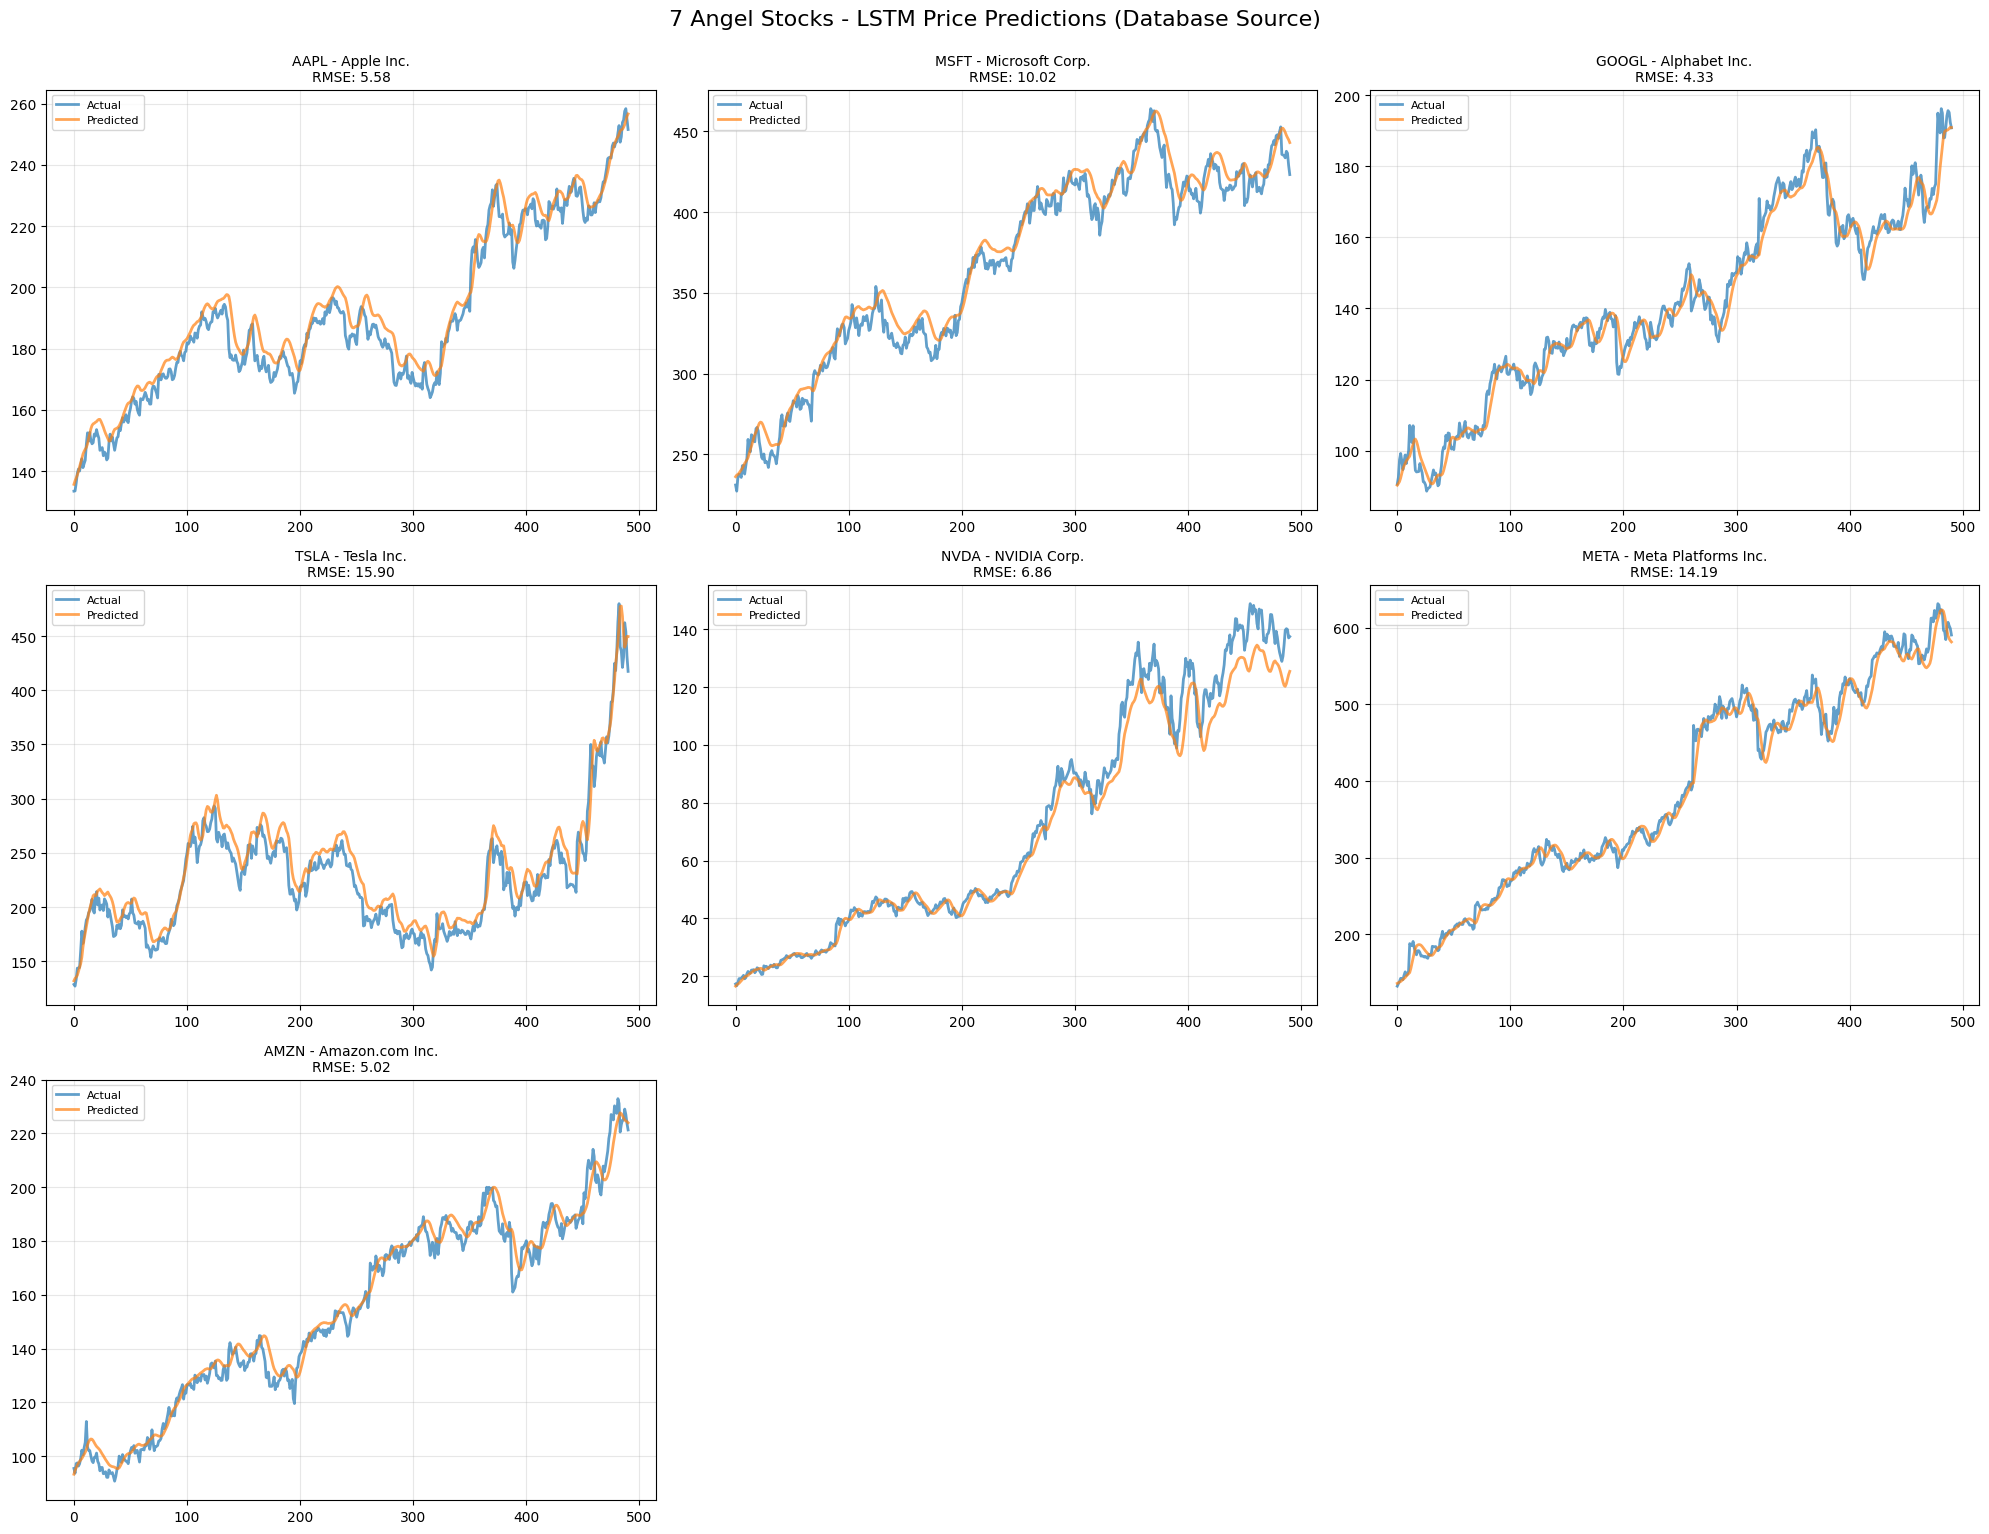


üíæ SAVING DATA WAREHOUSE FILES...
‚úÖ Combined Raw Data: data_warehouse/ALL_STOCKS_RAW_DATA.csv
   üìä Total Records: 17,605
‚úÖ Combined Predictions: data_warehouse/ALL_STOCKS_PREDICTIONS.csv
   üìä Total Predictions: 3,437
‚úÖ Performance Analytics: data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv
‚úÖ Data Dictionary: data_warehouse/DATA_DICTIONARY.csv

üìÅ DATA WAREHOUSE STRUCTURE:
‚îî‚îÄ‚îÄ data_warehouse/
    ‚îú‚îÄ‚îÄ ALL_STOCKS_RAW_DATA.csv       (‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)
    ‚îú‚îÄ‚îÄ ALL_STOCKS_PREDICTIONS.csv    (‡∏£‡∏ß‡∏°‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)
    ‚îú‚îÄ‚îÄ DATA_DICTIONARY.csv           (‡∏Ñ‡∏≥‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•)
    ‚îú‚îÄ‚îÄ raw_data/                     (‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô)
    ‚îÇ   ‚îú‚îÄ‚îÄ AAPL_raw_data.csv
    ‚îÇ   ‚îú‚îÄ‚îÄ MSFT_raw_data.csv
    ‚îÇ   ‚îî‚îÄ‚îÄ ... (7 files)
    ‚îú‚îÄ‚îÄ predictions/                  (‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡

In [3]:
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
import os
from datetime import datetime
warnings.filterwarnings('ignore')

# Database configuration
db_config = {
    'server': 'LAPTOP-IH3HR1CO',
    'database': 'DataWarehouse_Stock'
}

# Stock queries mapping
stock_queries = {
    'AAPL': 'SELECT * FROM gold.dim_aapl ORDER BY Date ASC',
    'AMZN': 'SELECT * FROM gold.dim_amzn ORDER BY Date ASC',
    'GOOGL': 'SELECT * FROM gold.dim_googl ORDER BY Date ASC',
    'META': 'SELECT * FROM gold.dim_meta ORDER BY Date ASC',
    'MSFT': 'SELECT * FROM gold.dim_msft ORDER BY Date ASC',
    'NVDA': 'SELECT * FROM gold.dim_nvda ORDER BY Date ASC',
    'TSLA': 'SELECT * FROM gold.dim_tsla ORDER BY Date ASC'
}

# Angel stocks information
angel_stocks = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corp.',
    'GOOGL': 'Alphabet Inc.',
    'TSLA': 'Tesla Inc.',
    'NVDA': 'NVIDIA Corp.',
    'META': 'Meta Platforms Inc.',
    'AMZN': 'Amazon.com Inc.'
}

# ‡∏™‡∏£‡πâ‡∏≤‡∏á folder ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö CSV files
os.makedirs('data_warehouse', exist_ok=True)
os.makedirs('data_warehouse/raw_data', exist_ok=True)
os.makedirs('data_warehouse/predictions', exist_ok=True)
os.makedirs('data_warehouse/analytics', exist_ok=True)

print("üåü 7 Angel Stocks LSTM Prediction + Data Warehouse üåü")
print("=" * 60)
print("üìä Data Source: SQL Server Database")
print(f"üîó Server: {db_config['server']}")
print(f"üóÑÔ∏è Database: {db_config['database']}")
print("üíæ CSV Files will be saved to: ./data_warehouse/")
print("=" * 60)

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏ï‡πà‡∏≠‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
def connect_to_database():
    try:
        connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={db_config['server']};DATABASE={db_config['database']};Trusted_Connection=yes;"
        conn = pyodbc.connect(connection_string)
        print("‚úÖ Database connection successful!")
        return conn
    except Exception as e:
        print(f"‚ùå Database connection failed: {str(e)}")
        return None

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
def fetch_stock_data(conn, symbol):
    try:
        query = stock_queries[symbol]
        print(f"üì• ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol} ‡∏à‡∏≤‡∏Å‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•...")
        df = pd.read_sql(query, conn)
        
        # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö debug
        print(f"üìã ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏û‡∏ö: {list(df.columns)}")
        
        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå Date
        if 'Date' not in df.columns:
            print(f"‚ö†Ô∏è ‡πÑ‡∏°‡πà‡∏û‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'Date' ‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol}")
            return None
        
        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå Close_value ‡πÅ‡∏ó‡∏ô Close
        if 'Close_value' not in df.columns:
            print(f"‚ö†Ô∏è ‡πÑ‡∏°‡πà‡∏û‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'Close_value' ‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol}")
            return None
        
        # ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ
        df = df.rename(columns={
            'Close_value': 'Close',
            'High_value': 'High',
            'Low_value': 'Low',
            'Open_value': 'Open'
        })
        
        # ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå Date ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ dayfirst=True ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö dd/mm/yyyy
        try:
            df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
        except:
            # ‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏•‡∏≠‡∏á‡πÉ‡∏ä‡πâ format='mixed'
            try:
                df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
            except:
                # ‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ ‡∏•‡∏≠‡∏á‡πÉ‡∏ä‡πâ infer_datetime_format
                df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, dayfirst=True)
        
        df.set_index('Date', inplace=True)
        
        # ‡πÄ‡∏£‡∏µ‡∏¢‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏°‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
        df = df.sort_index()
        
        print(f"‚úÖ ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à - {len(df)} records")
        print(f"üìÖ ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô: {df.index[0].strftime('%Y-%m-%d')}")
        print(f"üìÖ ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏™‡∏¥‡πâ‡∏ô‡∏™‡∏∏‡∏î: {df.index[-1].strftime('%Y-%m-%d')}")
        return df
        
    except Exception as e:
        print(f"‚ùå ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol}: {str(e)}")
        return None

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏≥‡∏î‡∏±‡∏ö
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì metrics
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•
conn = connect_to_database()
if conn is None:
    print("‚ùå ‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏ï‡πà‡∏≠‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÑ‡∏î‡πâ ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤")
    exit()

# ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
results = {}
predictions_data = {}
all_raw_data = []  # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
all_predictions = []  # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô
plt.figure(figsize=(20, 15))

for idx, (symbol, name) in enumerate(angel_stocks.items(), 1):
    print(f"\nüìà Processing {symbol} - {name}")
    
    try:
        # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
        df = fetch_stock_data(conn, symbol)
        
        if df is None or len(df) < 100:
            print(f"‚ö†Ô∏è ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol} ‡πÑ‡∏°‡πà‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏î‡∏∂‡∏á‡πÑ‡∏î‡πâ")
            continue
        
        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Data Warehouse
        df_warehouse = df.copy()
        df_warehouse['Symbol'] = symbol
        df_warehouse['Company_Name'] = name
        df_warehouse['Date'] = df_warehouse.index
        df_warehouse = df_warehouse.reset_index(drop=True)
        
        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô
        csv_filename = f'data_warehouse/raw_data/{symbol}_raw_data.csv'
        df_warehouse.to_csv(csv_filename, index=False)
        print(f"üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å {symbol} raw data -> {csv_filename}")
        
        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏Ç‡πâ‡∏≤ all_raw_data
        all_raw_data.append(df_warehouse)
        
        # ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö LSTM
        data = df[['Close']].copy()
        
        # Scaling
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(data)
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏≥‡∏î‡∏±‡∏ö
        sequence_length = 60
        X, y = create_sequences(scaled_data, sequence_length)
        
        if len(X) == 0:
            print(f"‚ö†Ô∏è ‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏•‡∏≥‡∏î‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö {symbol}")
            continue
        
        # ‡πÅ‡∏ö‡πà‡∏á train/test
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å LSTM
        model = create_lstm_model((X.shape[1], 1))
        
        print(f"üîÑ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å model ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö {symbol}...")
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                          validation_split=0.1, verbose=0)
        
        # ‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå
        predicted = model.predict(X_test, verbose=0)
        predicted_prices = scaler.inverse_transform(predicted)
        real_prices = scaler.inverse_transform(y_test)
        
        # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì metrics
        mse, mae, rmse = calculate_metrics(real_prices, predicted_prices)
        
        # ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        results[symbol] = {
            'name': name,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'last_price': real_prices[-1][0],
            'predicted_next': predicted_prices[-1][0]
        }
        
        predictions_data[symbol] = {
            'actual': real_prices.flatten(),
            'predicted': predicted_prices.flatten(),
            'dates': data.index[train_size + sequence_length:]
        }
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö predictions ‡πÅ‡∏•‡∏∞‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÄ‡∏õ‡πá‡∏ô CSV
        pred_df = pd.DataFrame({
            'Date': data.index[train_size + sequence_length:],
            'Symbol': symbol,
            'Company_Name': name,
            'Actual_Price': real_prices.flatten(),
            'Predicted_Price': predicted_prices.flatten(),
            'Prediction_Error': real_prices.flatten() - predicted_prices.flatten(),
            'Error_Percentage': ((real_prices.flatten() - predicted_prices.flatten()) / real_prices.flatten()) * 100
        })
        
        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô
        pred_filename = f'data_warehouse/predictions/{symbol}_predictions.csv'
        pred_df.to_csv(pred_filename, index=False)
        print(f"üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å {symbol} predictions -> {pred_filename}")
        
        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏Ç‡πâ‡∏≤ all_predictions
        all_predictions.append(pred_df)
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü
        plt.subplot(3, 3, idx)
        plt.plot(real_prices, label='Actual', alpha=0.7, linewidth=2)
        plt.plot(predicted_prices, label='Predicted', alpha=0.7, linewidth=2)
        plt.title(f'{symbol} - {name}\nRMSE: {rmse:.2f}', fontsize=10)
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        
        print(f"‚úÖ {symbol} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à - RMSE: {rmse:.2f}")
        
    except Exception as e:
        print(f"‚ùå ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏Å‡∏±‡∏ö {symbol}: {str(e)}")
        continue

# ‡∏õ‡∏¥‡∏î‡∏Å‡∏≤‡∏£‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏ï‡πà‡∏≠‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
conn.close()
print("\nüîê Database connection closed")

plt.tight_layout()
plt.suptitle('7 Angel Stocks - LSTM Price Predictions (Database Source)', fontsize=16, y=1.02)
plt.show()

# üíæ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏£‡∏ß‡∏°‡πÄ‡∏õ‡πá‡∏ô CSV Files ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Data Warehouse
print("\n" + "="*60)
print("üíæ SAVING DATA WAREHOUSE FILES...")
print("="*60)

# 1. ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
if all_raw_data:
    combined_raw = pd.concat(all_raw_data, ignore_index=True)
    combined_raw_file = 'data_warehouse/ALL_STOCKS_RAW_DATA.csv'
    combined_raw.to_csv(combined_raw_file, index=False)
    print(f"‚úÖ Combined Raw Data: {combined_raw_file}")
    print(f"   üìä Total Records: {len(combined_raw):,}")

# 2. ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
if all_predictions:
    combined_predictions = pd.concat(all_predictions, ignore_index=True)
    combined_pred_file = 'data_warehouse/ALL_STOCKS_PREDICTIONS.csv'
    combined_predictions.to_csv(combined_pred_file, index=False)
    print(f"‚úÖ Combined Predictions: {combined_pred_file}")
    print(f"   üìä Total Predictions: {len(combined_predictions):,}")

# 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á Summary Analytics
if results:
    analytics_data = []
    for symbol, data in results.items():
        analytics_data.append({
            'Symbol': symbol,
            'Company_Name': data['name'],
            'MSE': data['mse'],
            'MAE': data['mae'],
            'RMSE': data['rmse'],
            'Last_Actual_Price': data['last_price'],
            'Next_Predicted_Price': data['predicted_next'],
            'Price_Change_Prediction': data['predicted_next'] - data['last_price'],
            'Price_Change_Percent': ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100,
            'Analysis_Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'Data_Source': f'SQL Server Database - {db_config["database"]}'
        })
    
    analytics_df = pd.DataFrame(analytics_data)
    analytics_file = 'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv'
    analytics_df.to_csv(analytics_file, index=False)
    print(f"‚úÖ Performance Analytics: {analytics_file}")

# 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á Data Dictionary
data_dict = {
    'Table_Name': [
        'ALL_STOCKS_RAW_DATA',
        'ALL_STOCKS_PREDICTIONS', 
        'PERFORMANCE_ANALYTICS',
        'Individual Stock Files'
    ],
    'Description': [
        'Combined historical stock data for all 7 angel stocks from database',
        'LSTM model predictions vs actual prices',
        'Model performance metrics and investment insights',
        'Individual CSV files for each stock (raw data + predictions)'
    ],
    'Location': [
        'data_warehouse/ALL_STOCKS_RAW_DATA.csv',
        'data_warehouse/ALL_STOCKS_PREDICTIONS.csv',
        'data_warehouse/analytics/PERFORMANCE_ANALYTICS.csv',
        'data_warehouse/raw_data/ & data_warehouse/predictions/'
    ],
    'Update_Frequency': [
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)',
        'Daily (when script runs)'
    ],
    'Data_Source': [
        f'SQL Server: {db_config["server"]}/{db_config["database"]}',
        'LSTM Model Predictions',
        'Calculated Metrics',
        'Database + Model Output'
    ]
}

data_dict_df = pd.DataFrame(data_dict)
dict_file = 'data_warehouse/DATA_DICTIONARY.csv'
data_dict_df.to_csv(dict_file, index=False)
print(f"‚úÖ Data Dictionary: {dict_file}")

print(f"\nüìÅ DATA WAREHOUSE STRUCTURE:")
print(f"‚îî‚îÄ‚îÄ data_warehouse/")
print(f"    ‚îú‚îÄ‚îÄ ALL_STOCKS_RAW_DATA.csv       (‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)")
print(f"    ‚îú‚îÄ‚îÄ ALL_STOCKS_PREDICTIONS.csv    (‡∏£‡∏ß‡∏°‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)")
print(f"    ‚îú‚îÄ‚îÄ DATA_DICTIONARY.csv           (‡∏Ñ‡∏≥‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•)")
print(f"    ‚îú‚îÄ‚îÄ raw_data/                     (‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡∏¥‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô)")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ AAPL_raw_data.csv")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ MSFT_raw_data.csv")
print(f"    ‚îÇ   ‚îî‚îÄ‚îÄ ... (7 files)")
print(f"    ‚îú‚îÄ‚îÄ predictions/                  (‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô)")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ AAPL_predictions.csv")
print(f"    ‚îÇ   ‚îú‚îÄ‚îÄ MSFT_predictions.csv")
print(f"    ‚îÇ   ‚îî‚îÄ‚îÄ ... (7 files)")
print(f"    ‚îî‚îÄ‚îÄ analytics/")
print(f"        ‚îî‚îÄ‚îÄ PERFORMANCE_ANALYTICS.csv (‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û)")

# 7. ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
print("\n" + "="*80)
print("üìä SUMMARY RESULTS - 7 ANGEL STOCKS (DATABASE SOURCE)")
print("="*80)

if results:
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡∏∏‡∏õ
    summary_df = pd.DataFrame(results).T
    summary_df = summary_df.round(2)
    
    print("\nüèÜ PERFORMANCE RANKING (‡∏à‡∏≤‡∏Å‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î - RMSE ‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î)")
    print("-" * 60)
    
    sorted_results = sorted(results.items(), key=lambda x: x[1]['rmse'])
    
    for rank, (symbol, data) in enumerate(sorted_results, 1):
        print(f"{rank}. {symbol} ({data['name']})")
        print(f"   RMSE: ${data['rmse']:.2f} | MAE: ${data['mae']:.2f}")
        print(f"   ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î: ${data['last_price']:.2f}")
        print(f"   ‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå: ${data['predicted_next']:.2f}")
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        trend = "üìà" if change > 0 else "üìâ"
        print(f"   ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°: {trend} {change:+.1f}%")
        print()
    
    # ‡πÅ‡∏™‡∏î‡∏á‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏£‡∏ß‡∏°
    avg_rmse = np.mean([data['rmse'] for data in results.values()])
    best_stock = min(results.items(), key=lambda x: x[1]['rmse'])
    worst_stock = max(results.items(), key=lambda x: x[1]['rmse'])
    
    print(f"üìà PORTFOLIO STATISTICS")
    print(f"Average RMSE: ${avg_rmse:.2f}")
    print(f"Best Performer: {best_stock[0]} (RMSE: ${best_stock[1]['rmse']:.2f})")
    print(f"Needs Improvement: {worst_stock[0]} (RMSE: ${worst_stock[1]['rmse']:.2f})")
    
    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡πÄ‡∏™‡∏ô‡∏≠‡πÅ‡∏ô‡∏∞
    print(f"\nüí° INVESTMENT INSIGHTS")
    print(f"‚ú® ‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏î‡∏µ (‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change > 2:
            print(f"   üìà {symbol}: +{change:.1f}%")
    
    print(f"\n‚ö†Ô∏è  ‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡∏ß‡∏£‡∏£‡∏∞‡∏ß‡∏±‡∏á (‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏•‡∏î‡∏•‡∏á > 2%):")
    for symbol, data in results.items():
        change = ((data['predicted_next'] - data['last_price']) / data['last_price']) * 100
        if change < -2:
            print(f"   üìâ {symbol}: {change:.1f}%")

else:
    print("‚ùå ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à")

print(f"\nüåü Happy Trading with 7 Angel Stocks! üåü")
print(f"üìä Data Source: {db_config['server']}/{db_config['database']}")